# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [121]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Your Code goes here:

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [142]:
# (1) # Your Code goes here:
auto_numeric_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(auto_numeric_loc)
print(auto_numeric.describe())

       normalized-losses  wheel-base      length       width      height  \
count         159.000000  159.000000  159.000000  159.000000  159.000000   
mean          121.955975   98.559748  171.698113   65.729560   53.925157   
std            39.434186    5.803361   12.656791    2.292021    2.410446   
min            65.000000   86.600000  141.100000   60.300000   49.400000   
25%            93.000000   94.500000  163.400000   64.000000   52.000000   
50%           110.000000   97.000000  171.700000   65.400000   54.100000   
75%           145.000000  101.200000  177.800000   66.500000   55.600000   
max           256.000000  115.600000  202.600000   71.700000   59.800000   

       engine-size        bore      stroke  compression-ratio   engine-power  \
count   159.000000  159.000000  159.000000         159.000000     159.000000   
mean     14.056352    3.294528    3.219874          10.446855   98528.301887   
std      17.143568    0.296959    0.381833           4.414796   34123.71596

(2) ***Your answer goes here:***
The dataset includes various features included in most cars and contains their values numerically. The right-most column is the price of a car with all of the features of the previous columns.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

normalized-losses          0.015368
wheel-base                 0.423511
length                     0.512883
width                      0.524326
height                     0.139563
engine-size                0.715125
bore                       0.365207
stroke                     0.127834
compression-ratio          0.125683
engine-power               0.443969
peak-rpm                  -0.099345
city-mpg                  -0.356790
highway-mpg               -0.438467
mean-effective-pressure   -0.104860
torque                     0.101435
price                      1.000000
Name: price, dtype: float64


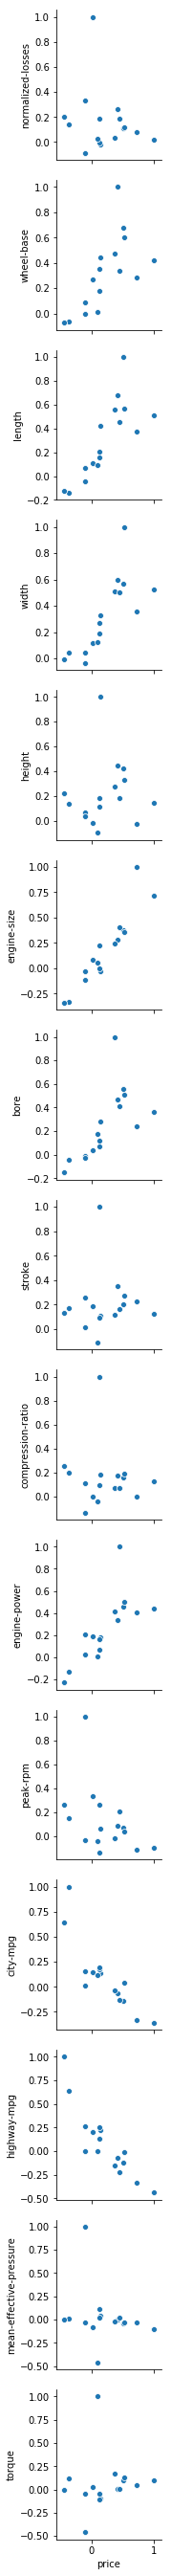

In [22]:
# (1) # Your Code goes here:
priceCorr = auto_numeric.corr()['price']
print(priceCorr)
sns.pairplot(auto_numeric.corr(), x_vars=['price'], y_vars=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'engine-power', 'peak-rpm', 'city-mpg', 'highway-mpg', 'mean-effective-pressure', 'torque'])

(2) ***Your answer goes here:***
The attributes that seem most helpful in predicting the price are 'wheel-base', 'length', 'width', 'engine-size', and 'engine-power'. These attributes have the highest correlation coefficients of all the attributes, meaning that they correlate most closely with the price.

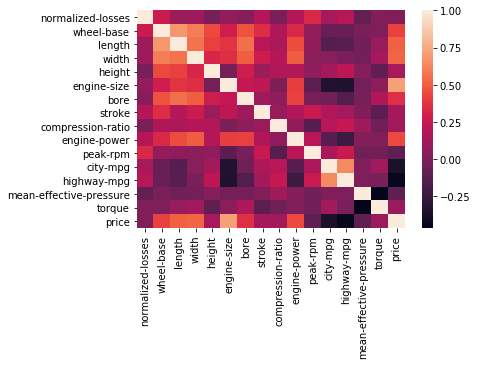

In [10]:
# (3) # Your Code goes here:
sns.heatmap(auto_numeric.corr(), xticklabels = auto_numeric.corr().columns, yticklabels=auto_numeric.corr().columns)

(4) ***Your answer goes here:***
Engine power and engine size, width and length, width and wheel base, and length and wheel base all share pretty high correlations with each other. They can easily be spotted on the heatmap above as brighter squares.

(5) ***Your answer goes here:***
We can increase the dimensionality by removing the attributes with correlation coefficients that are closest to zero. These are the attributes with the weakes correlation with the price.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

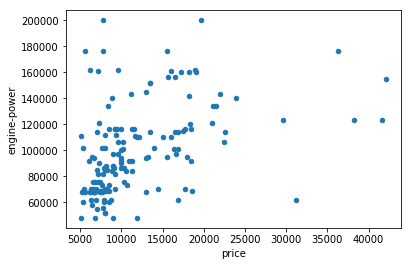

In [23]:
# (1) # Your Code goes here:
auto_numeric.plot.scatter(x='price', y='engine-power')

(2) ***Your answer goes here:***
There is an overall trend towards higher prices with higher powered engines, but there are several outliers and exceptions that would probably need to be removed first.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

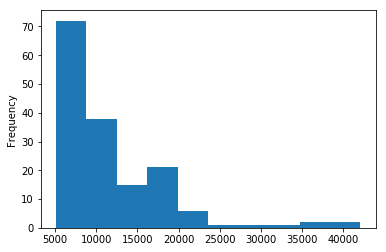

In [28]:
# (1) # Your Code goes here:
auto_numeric['price'].plot.hist(bins=10)

(2) ***Your answer goes here:***

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [85]:
# Your Code goes here:
X = auto_numeric['engine-power'].values.reshape(159, 1)
y = auto_numeric['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size=0.2)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [11]:
# Your Code goes here:
# I will use the mean as a baseline
print("The baseline for price is ", y.mean())

The baseline for price is  11684.723270440252


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [23]:
# (1) # Your Code goes here:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("The weight of the linear regression is ", lr.coef_)

The weight of the linear regression is  [0.07612572]


(2) ***Your answer goes here:***
The weight of the regression function indicates the factor by which engine power effects the price.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

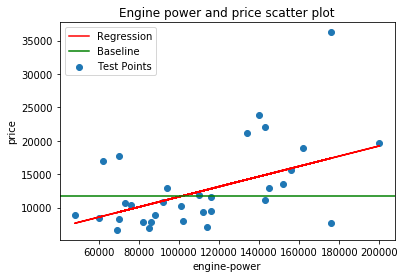

In [53]:
# (1) # Your Code goes here:

# Test points
plt.scatter(X_test, y_test, label='Test Points')

# Regression line
plt.plot(X_test, lr.predict(X_test), color='red', label='Regression')

# Baseline (mean)
plt.axhline(y = y.mean(), color='green', label='Baseline')

plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Engine power and price scatter plot')
plt.legend()
plt.show()

(2) ***Your answer goes here:***
My baseline is simply the mean, so it is static but it is still very close at most points to the predicted regression line.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<function matplotlib.pyplot.show(*args, **kw)>

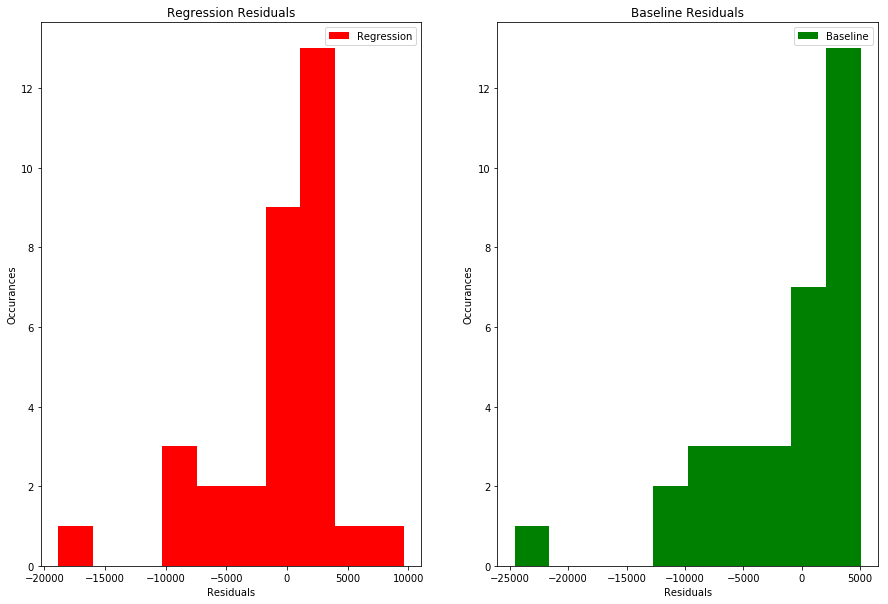

In [75]:
# (1) # Your Code goes here:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
plt.hist(lr.predict(X_test) - y_test, label='Regression', color='red')
plt.title("Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Occurances")
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(y.mean() - y_test, label='Baseline', color='green')
plt.title("Baseline Residuals")
plt.xlabel("Residuals")
plt.ylabel("Occurances")
plt.legend()

plt.show

In [82]:
# (2) # Your Code goes here:
print("Coefficient of determination for regression is ", r2_score(y_test, lr.predict(X_test)))
print("Root mean squared error for regression is ", np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

baseline = np.full_like(y_test, y.mean())
print("Coefficient of determination the baseline is ", r2_score(y_test, baseline))
print("Root mean squared error the baseline is ", np.sqrt(mean_squared_error(y_test, baseline)))

Coefficient of determination for regression is  0.2877353258082337
Root mean squared error for regression is  5342.290798636393
Coefficient of determination the baseline is  -0.038856181629569164
Root mean squared error the baseline is  6451.854071065994


(3) ***Your answer goes here:***
The graphs are showing the differences between the predicted values and the actual values from the test dataset. We can clearly see that the linear regression line is tallest around 0 and looks similar to a normal distribution. For the baseline, we can see that the residuals increase gradually because the baseline value is constant and the actual values increase along the plot. 
The coefficient of determination determines how effective a model is and a perfect model would have a value of 1. In this case, the linear regression model has the higher value. The mean squared error measures the average difference between the predictions and the actual value. The linear regression model has a lower mean squared difference meaning that the predictions were closer to the true values compared to the baseline mean. 
These two values are reflected on the histograms as we can see that the linear regression model is more accurate compared to the baseline mean model.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***
The problem with the hold-out test set is that it is pretty small and comes from the same set as the training set. Ideally we would have a much larger test set.

In [127]:
# (2) # Your Code goes here:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

kf.get_n_splits(X)

i = 0
for train_index, test_index in kf.split(X):
    print("Train:\n", train_index, "\nTest:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

Train:
 [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158] 
Test:
 [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]
Train:
 [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  81  82  83  84  85
  86  87  88  90  91  92  94  95  98

In [105]:
# (3) # Your Code goes here:
klr = LinearRegression()
kPredict = cross_val_predict(klr, X, y, cv=kf)
print("Coefficient of determination is ", r2_score(y, kPredict))
print("Root mean squared error is ", np.sqrt(mean_squared_error(y, kPredict)))

Coefficient of determination is  0.17300527097570761
Root mean squared error is  6114.452118615524


(4) ***Your answer goes here:*** 
The coefficient of determination is lower than that of the model from the previous quesions. This could be because the test set is much larger and there is more room for error, but I was still surprised at this result. The mean squared error for regression is also larger, meaning there is more error. However, these numbers are still better than the baseline values.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [136]:
# (1) # Your Code goes here:

auto_base_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(auto_base_loc)

X2 = auto_base['engine-power'].values.reshape(159, 1)
y2 = auto_base['price'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.8 ,test_size=0.2)

baseLR = LinearRegression()
baseLR.fit(X2_train, y2_train)

print("Coefficient of determination is ", r2_score(y2_test, baseLR.predict(X2_test)))
print("Root mean squared error is ", np.sqrt(mean_squared_error(y2_test, baseLR.predict(X2_test))))

Coefficient of determination is  -5.192393525366157e-06
Root mean squared error is  6801.65426109323


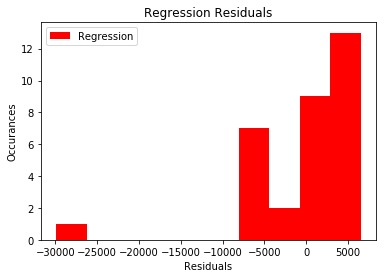

In [137]:
# (2) Show any working code here...
# Your Code goes here:
plt.hist(baseLR.predict(X2_test) - y2_test, label='Regression', color='red')
plt.title("Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Occurances")
plt.legend()

plt.show()

(2) - Final Conclusion(s)
***Your answer goes here:***
The significant decrease in performance is probably due to some more extreme outliers. While there is only one that is far out to the left, the residuals also do not follow a very normal distribution. Together these qualities can significantly decrease the performance.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [112]:
# (1) # Your Code goes here:
mvLR = LinearRegression()

mvX = auto_numeric.drop('price', axis=1)
mvY = auto_numeric['price'].values

mvPredict = cross_val_predict(mvLR, mvX, mvY, cv=kf)

print("Coefficient of determination is ", r2_score(mvY, mvPredict))
print("Root mean squared error is ", np.sqrt(mean_squared_error(mvY, mvPredict)))

Coefficient of determination is  0.48613798445730405
Root mean squared error is  4819.80464283464


(2) ***Your answer goes here:***
This result is much more accurate than the ones from past questions as evidenced by the higher coefficient of determination and the lower root mean squared error.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

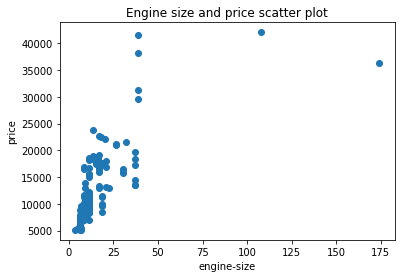

In [113]:
# (1) # Your Code goes here:
plt.scatter(auto_numeric['engine-size'], auto_numeric['price'])
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Engine size and price scatter plot')
plt.show()

(2) ***Your answer goes here:***
This correlation could cause a problem for linear regression because it seems like there is very little relation between price and engine size. 

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

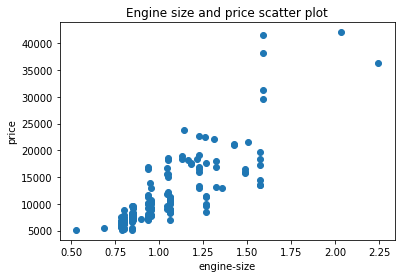

In [120]:
# (1) # Your Code goes here:

# The dataset can be transformed with a log transformation
# Taking the log of the dataset makes the outliers more acceptable

engineSize = np.log10(auto_numeric['engine-size'])

plt.scatter(engineSize, auto_numeric['price'])
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Engine size and price scatter plot')
plt.show()

In [118]:
# (2) # Your Code goes here:
# Inserts transformed engine size into dataset
mvX['engine-size'] = engineSize

tranPredict = cross_val_predict(mvLR, mvX, mvY, cv=kf)

print("Coefficient of determination is ", r2_score(mvY, tranPredict))
print("Root mean squared error is ", np.sqrt(mean_squared_error(mvY, tranPredict)))

Coefficient of determination is  0.6896122680289531
Root mean squared error is  3745.9195975598323


(3) ***Your answer goes here:***
The performance is significantly improved over the dataset that did not have the transformed engine-size. The outliers in the previous version were responsible for decreasing the performance. This shows how much outliers can effect the performance of a model.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***
Each attribute in the data is on it's own scale. For example, engine size and engine power are measured differently and the attribute on a smaller scale will appear to have a weaker correlation even if that is not the case. We can scale the dataset linearly to make up for the differences. One possible example of preprocessing is min-max preprocessing which gives all data a range and scales all the values down to that range.

In [133]:
# (2) # Your Code goes here:
minMax = MinMaxScaler()
minMax.fit(mvX)
mvXtran = minMax.transform(mvX)

# Restores column titles
mvXtran = pd.DataFrame(mvXtran, columns = mvX.columns)

# Iterates over each feature and compares it with price. The mean is printed at the end of each feature's loop
for i in mvXtran:
    index = 0
    total = 0
    for j in mvXtran[i]:
        total += j / mvY[index]
        index += 1
    print("Mean coefficient of ", i, " is ", total / index)
        

Mean coefficient of  normalized-losses  is  3.14271734444216e-05
Mean coefficient of  wheel-base  is  4.005171607336052e-05
Mean coefficient of  length  is  4.802959178360246e-05
Mean coefficient of  width  is  4.649825813660231e-05
Mean coefficient of  height  is  4.436984777605749e-05
Mean coefficient of  engine-size  is  2.618545506218122e-05
Mean coefficient of  bore  is  5.359291860098099e-05
Mean coefficient of  stroke  is  5.732278207613619e-05
Mean coefficient of  compression-ratio  is  2.2371297736308203e-05
Mean coefficient of  engine-power  is  3.083272164291513e-05
Mean coefficient of  peak-rpm  is  4.0340732895164265e-05
Mean coefficient of  city-mpg  is  4.194040781959942e-05
Mean coefficient of  highway-mpg  is  4.681009176929755e-05
Mean coefficient of  mean-effective-pressure  is  5.024298934642681e-05
Mean coefficient of  torque  is  4.374129409667069e-06


(3) ***Your answer goes here:***
If this was calculated correctly, the largest values should correlate most closely with the price. In this case the top 3 are compression-ratio, engine-size, and engine-power. Engine size has also been transformed from earlier, so that may explain why it is so high on the list.

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***
I would probably want to test the higher orders on features with a variety of relationships to the price. For example, I would want one with a high correlation and one with a low correlation with it.

In [141]:
# (2) # Your Code goes here:
auto_nonlinear_loc = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_nonlinear = pd.read_csv(auto_nonlinear_loc)

length = auto_nonlinear['length']
enginePower = auto_nonlinear['engine-power']

# Square both features
auto_nonlinear['length'] = length ** 2
auto_nonlinear['engine-power'] = enginePower ** 2

X3 = auto_nonlinear.drop('price', axis=1)
y3 = auto_nonlinear['price'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.8 ,test_size=0.2)

nonlinearLR = LinearRegression()
nonlinearLR.fit(X3_train, y3_train)

print("Coefficient of determination is ", r2_score(y3_test, nonlinearLR.predict(X3_test)))
print("Root mean squared error is ", np.sqrt(mean_squared_error(y3_test, nonlinearLR.predict(X3_test))))

Coefficient of determination is  0.7593693037514668
Root mean squared error is  3441.4208642337476


(3) ***Your answer goes here:***
The result is much more accurate than past models in this assignment. The coefficeint of determination is closer to 1 and the root mean squared error is smaller. In comparison to the result in question 3.3, the numbers are actually somewhat similar. This could be because both use nonlinear transformations to make outliers more acceptable and less problematic.